In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# filtering the waring messages
warnings.filterwarnings('ignore') 

### Reading the Training Dataset

In [4]:
df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

## Exploratory Data Analysis on Dataset

### Visualizing the first 5 and last 5 rows of the dataset

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [6]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00
174999,1,2023-06-30 21:26:43,2023-06-30 22:54:42,1.0,1.01,1.0,N,153,72,Credit Card,1.0,6.541699,0.0,1.0,16.32,2.5,0.00


### Listing Columns and Their Types in the Datasets

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [9]:
df.shape

(175000, 17)

#### Converting the Pickup and Dropoff Time to datetime object
> Here, the Pickup and Dropoff times are currently in Object Data type. converting them into the Pandas Datetime Objects

In [10]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [11]:
# Verifying the Conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               175000 non-null  int64         
 1   tpep_pickup_datetime   175000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  175000 non-null  datetime64[ns]
 3   passenger_count        168923 non-null  float64       
 4   trip_distance          175000 non-null  float64       
 5   RatecodeID             168923 non-null  float64       
 6   store_and_fwd_flag     168923 non-null  object        
 7   PULocationID           175000 non-null  int64         
 8   DOLocationID           175000 non-null  int64         
 9   payment_type           175000 non-null  object        
 10  extra                  175000 non-null  float64       
 11  tip_amount             175000 non-null  float64       
 12  tolls_amount           175000 non-null  floa

In [12]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000,175000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,2023-06-29 20:08:41.719628544,2023-06-29 20:26:35.299731712,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
min,0.000000,2023-06-28 15:26:39,2023-06-28 15:32:43,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,2023-06-29 08:19:04,2023-06-29 08:33:55.750000128,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,2023-06-29 19:03:37.500000,2023-06-29 19:21:36,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,2023-06-30 12:33:12.500000,2023-06-30 12:52:20.249999872,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,2023-07-01 00:58:11,2023-07-01 23:10:43,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000
std,0.445606,NaN,NaN,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968


## Data Summary

## Data Size
The dataset comprises 175,000 entries and 17 Columns

## VendorID
Predominantly, approximately 73% of rides are associated with VendorID 1, with occasional instances of VendorID 2.

## Passenger Count
On average, rides have 1.36 passengers, ranging from a minimum of 0 (potentially indicating an error) to a maximum of 9 passengers.

## Trip Distance
The average trip distance is 5.15 miles, with an unusual maximum of 135,182.06 miles, requiring further investigation.

## RatecodeID
Most rides have a RatecodeID of 1 (standard rate), but other RatecodeIDs are also present.

## Extra, Tip Amount, Tolls Amount
These columns reflect additional charges with varying minimum and maximum values.

## Total Amount
The average total amount paid for rides is 29.63, with a minimum of -576.75 (potential error) and a maximum of $587.25.

## Congestion Surcharge
While most rides have a 0 congestion surcharge, some show positive and negative values.

## Airport Fee
The average airport fee is 0.16, with instances of higher fees.


#### Distribution of VendorID

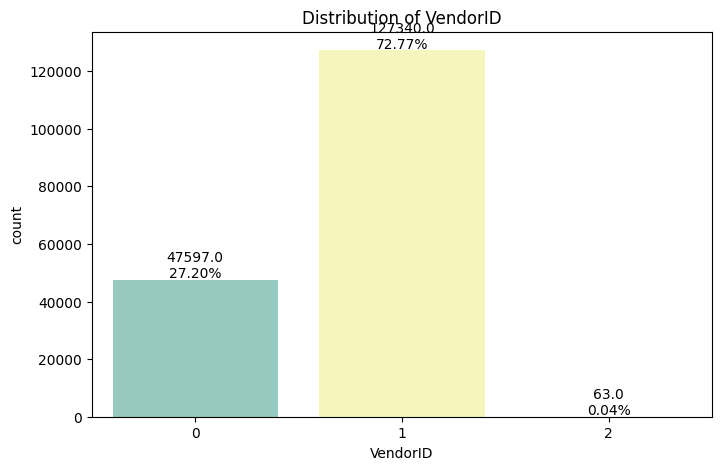

In [13]:
# Setting the size of the plot
plt.figure(figsize=(8, 5))

# Creating a bar chart for the 'VendorID' column from the DataFrame 'df' using different colors
ax = sns.countplot(x='VendorID', data=df, palette='Set3')

# Calculating the total number of entries in the 'VendorID' column
total = float(len(df['VendorID']))

# Adding labels on top of each bar showing the count and percentage
for p in ax.patches:
    height = p.get_height()
    # Displaying count and percentage above each bar, rounded to two decimal places
    ax.annotate(f'{height}\n{height/total:.2%}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Setting a title for the plot
plt.title('Distribution of VendorID')

# Displaying the plot
plt.show()

#### Findings:
- After analysing the Vendor's Distribution, it's seen that the Vendor with Vendor ID 1 has the most number of trip count more than 70%
- Vendor ID 2 has the least, only 0.04%

#### Distribution of Payment Type

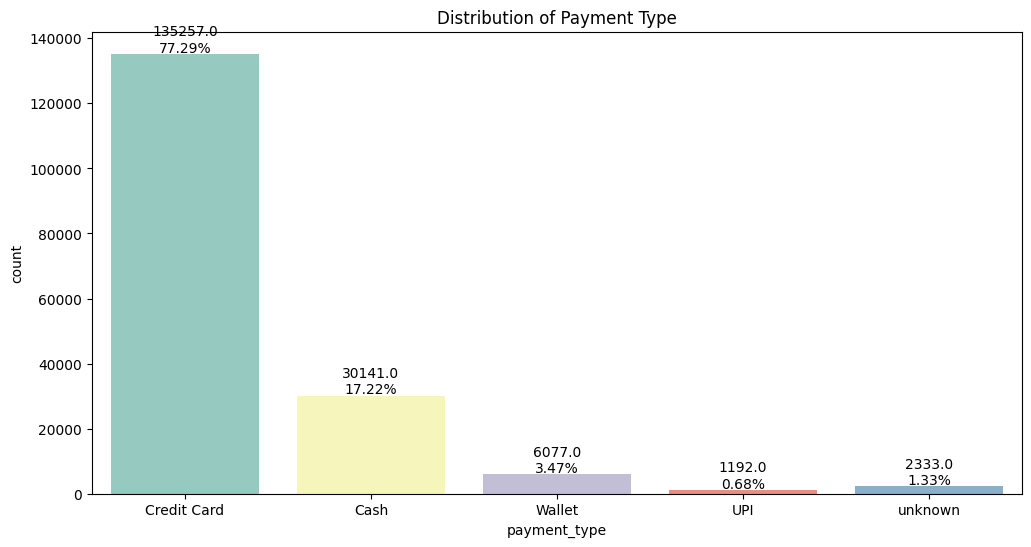

In [14]:
# Setting the size of the plot
plt.figure(figsize=(12, 6))

# Creating a bar chart for the 'payment_type' column from the DataFrame 'df' using different colors
ax = sns.countplot(x='payment_type', data=df, palette='Set3')

# Calculating the total number of entries in the 'payment_type' column
total = float(len(df['payment_type']))

# Adding labels on top of each bar showing the count and percentage
for p in ax.patches:
    height = p.get_height()
    # Displaying count and percentage above each bar, rounded to two decimal places
    ax.annotate(f'{height}\n{height/total:.2%}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Setting a title for the plot
plt.title('Distribution of Payment Type')

# Displaying the plot
plt.show()

#### Findings:
- After analysing the Distribution of Payment Type, it's seen that the most of the passengers prefere to do the Payment using the credit card.
- Some Passengers also prefer to pay using the CASH (17%)
- Very less amount of passengers use UPI as an Option to Pay (0.68%)

#### Ratecode Vs the Average trip Amount

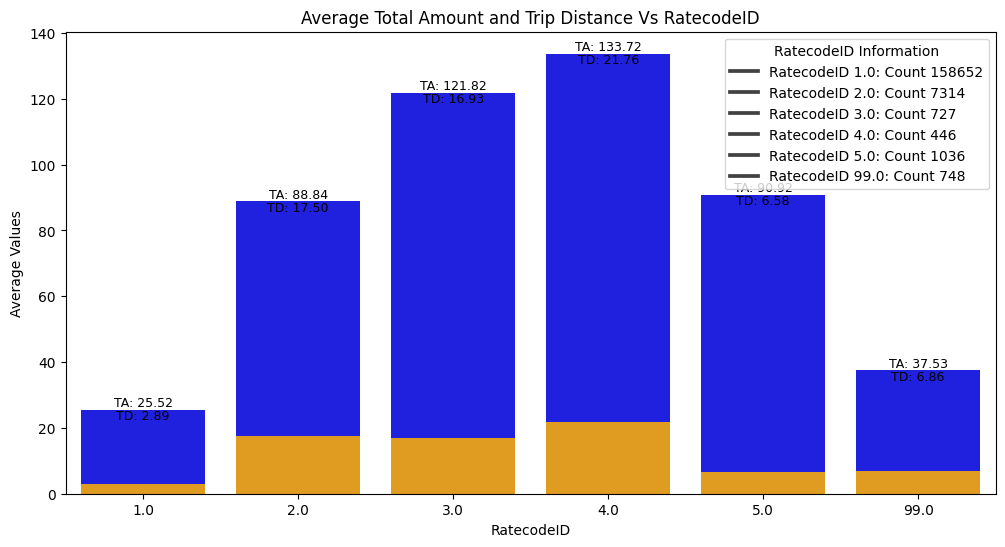

In [15]:
# Calculating statistics for 'RatecodeID' grouping by mean total_amount, count, and mean trip_distance
ratecode_stats = df.groupby('RatecodeID').agg({'total_amount': ['mean', 'count'], 'trip_distance': 'mean'}).sort_index()
ratecode_stats.columns = ['total_amount_mean', 'count', 'trip_distance_mean']

# Setting the size of the plot
plt.figure(figsize=(12, 6))

# Creating bar plots for average total amount and average trip distance based on 'RatecodeID'
total_amount_plot = sns.barplot(x=ratecode_stats.index, y=ratecode_stats['total_amount_mean'], color='blue', label='Avg Total Amount')
trip_distance_plot = sns.barplot(x=ratecode_stats.index, y=ratecode_stats['trip_distance_mean'], color='orange', label='Avg Trip Distance')

# Adding labels and title to the plot
plt.xlabel('RatecodeID')
plt.ylabel('Average Values')
plt.title('Average Total Amount and Trip Distance Vs RatecodeID')

# Adding annotations for Total Amount and Trip Distance on each bar
for p, total_amount, trip_distance in zip(total_amount_plot.patches, ratecode_stats['total_amount_mean'], ratecode_stats['trip_distance_mean']):
    height = p.get_height()
    # Displaying Total Amount and Trip Distance on each bar, formatted to two decimal places
    plt.text(p.get_x() + p.get_width() / 2., height, f'TA: {total_amount:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(p.get_x() + p.get_width() / 2., height, f'TD: {trip_distance:.2f}', ha='center', va='top', fontsize=9)

# Adding legend with titles for the values
plt.legend(title='Values')

# Creating legend labels based on RatecodeID and Count information
legend_labels = [f'RatecodeID {idx}: Count {count}' for idx, count in zip(ratecode_stats.index, ratecode_stats['count'])]
# Adding legend with RatecodeID information to the upper right corner
plt.legend(legend_labels, title='RatecodeID Information', loc='upper right')

# Displaying the plot
plt.show()

#### Findings:
- After analysing the Ratecode Vs the Average trip Amount vs Trip Distance, it's seen that the rateCode id 4 has the highest average Total Amount, and the Aveage Trip Distance with a sighlt difference with ratecode ID 3
- RatecodeID 1 has the least Average total Amount and Average Trip distance
- The RatecodeID1 alos has the highest number of trip count

### Weekday vs Avg Total Amount

In [16]:
# Extracting weekday
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.day_name()
df['count'] = 1

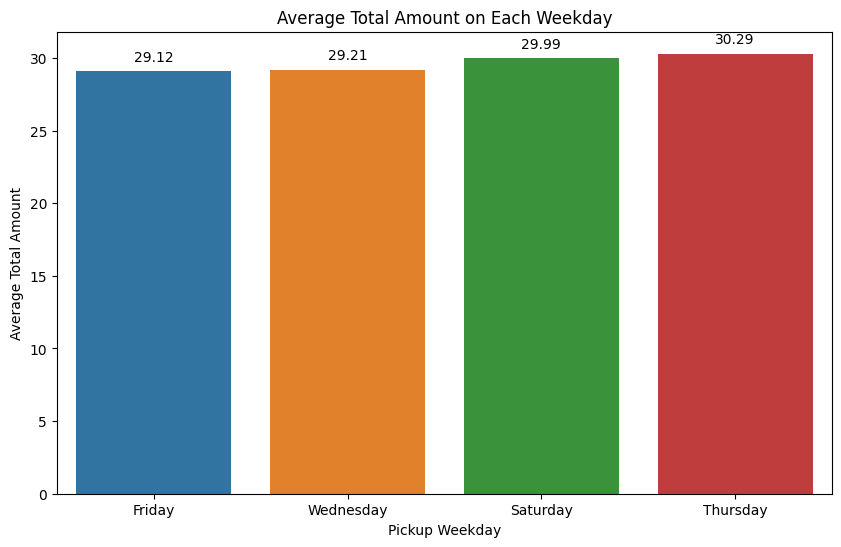

In [17]:
# Calculating the average total_amount for each pickup weekday
weekday_stats = df.groupby('pickup_weekday')['total_amount'].mean().sort_values()

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a bar plot for average total_amount on each pickup weekday
ax = sns.barplot(x=weekday_stats.index, y=weekday_stats.values)

# Adding annotations for average total_amount on each bar
for p, mean_value in zip(ax.patches, weekday_stats.values):
    height = p.get_height()
    # Displaying average total_amount on each bar, formatted to two decimal places
    ax.annotate(f'{mean_value:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title to the plot
plt.xlabel('Pickup Weekday')
plt.ylabel('Average Total Amount')
plt.title('Average Total Amount on Each Weekday')

# Displaying the plot
plt.show()


#### Findings:
- After analysing the Weekday Vs the Average trip Amount vs Trip Distance, each day has an same amount of distribution

### Weekday vs Passanger Count

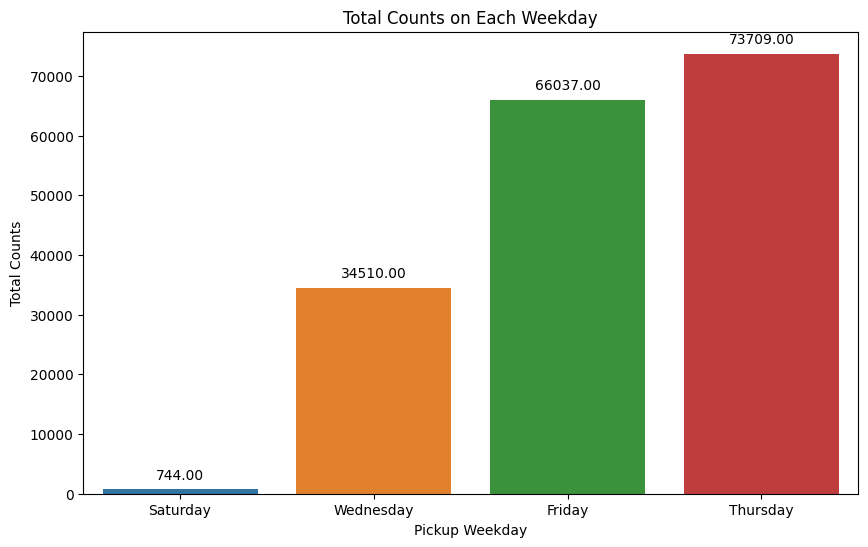

In [18]:
# Calculating the sum of counts for each pickup weekday
weekday_stats = df.groupby('pickup_weekday')['count'].sum().sort_values()

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a bar plot for the sum of counts on each pickup weekday
ax = sns.barplot(x=weekday_stats.index, y=weekday_stats.values)

# Adding annotations for the sum of counts on each bar
for p, sum_value in zip(ax.patches, weekday_stats.values):
    height = p.get_height()
    # Displaying the sum of counts on each bar, formatted to two decimal places
    ax.annotate(f'{sum_value:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title to the plot
plt.xlabel('Pickup Weekday')
plt.ylabel('Total Counts')
plt.title('Total Counts on Each Weekday')

# Displaying the plot
plt.show()


#### Findings:
- Passengers tend to take more number of Trips on Thursady, when compared to other days of the week

### Skewness of the Variables

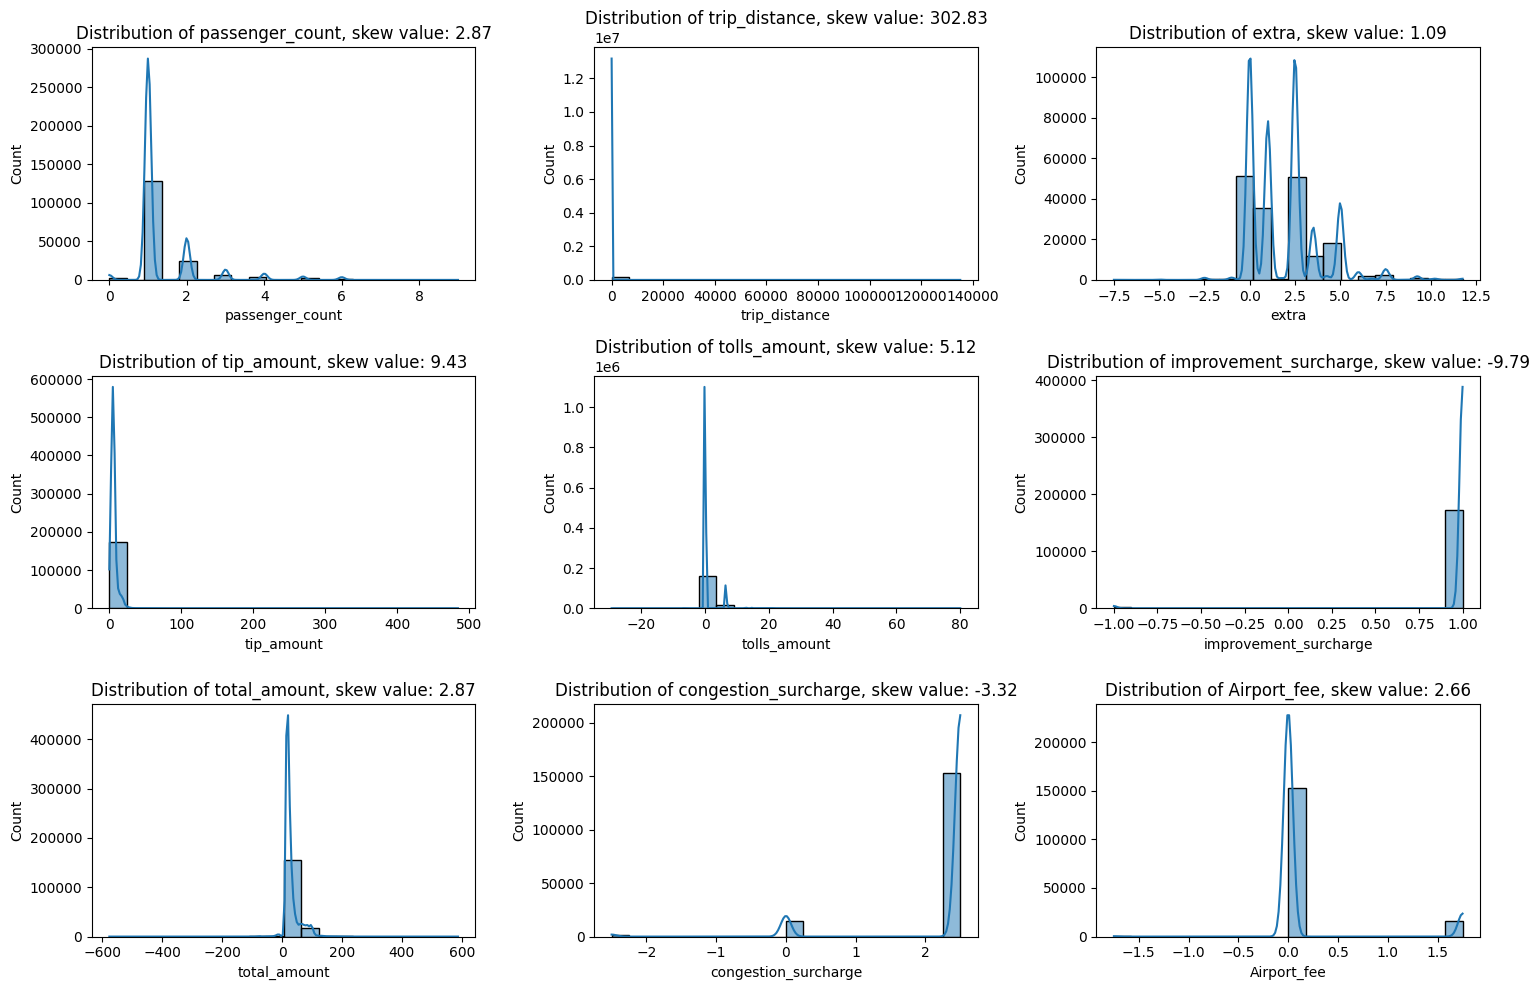

In [19]:
# Defining the list of selected columns
selected_columns = ['passenger_count', 'trip_distance', 'extra', 'tip_amount', 
                    'tolls_amount', 'improvement_surcharge', 'total_amount', 
                    'congestion_surcharge', 'Airport_fee']

# Setting the size of the overall plot
plt.figure(figsize=(15, 10))

# Creating subplots for each selected column
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    # Creating a histogram with a kernel density estimate for the selected column
    sns.histplot(df[column], kde=True, bins=20)
    # Adding a title for each subplot with the column name and its skewness value
    plt.title(f'Distribution of {column}, skew value: {df[column].skew():.2f}')

# Adjusting layout to prevent overlap of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


#### Findings:
**Passenger_count (2.87):**

The positive skewness indicates a right-skewed distribution, implying that most rides have a lower passenger count, with a few having a higher count.

**Trip_distance (302.83):**

The very high positive skewness suggests an extreme right-skewed distribution. In general, most rides cover short distances, but there are a few rides with exceptionally long distances.

**Extra (1.09):**

With slightly positive skewness, the distribution leans to the right. Typically, the majority of rides have a lower extra charge, while some incur higher extra charges.

**Tip_amount (9.43):**

Significantly positive skewness indicates a highly right-skewed distribution. Most rides receive lower tip amounts, while a few garner very high tip amounts.

**Tolls_amount (5.12):**

The strongly positive skewness signifies a right-skewed distribution. The majority of rides do not incur tolls, but a few rides have substantial toll amounts.

**Improvement_surcharge (-9.79):**

With very high negative skewness, the distribution leans strongly to the left. Most rides have a positive improvement surcharge, but a few have a negative surcharge.

**Total_amount (2.87):**

Similar to passenger_count, positive skewness implies a right-skewed distribution. Generally, most rides have a lower total amount, with a few having a higher total amount.

**Congestion_surcharge (-3.32):**

Moderately negative skewness indicates a left-skewed distribution. Most rides have a positive congestion surcharge, but a few have a negative surcharge.

**Airport_fee (2.66):**

Positive skewness suggests a right-skewed distribution, where most rides have a lower airport fee, and some incur higher fees.


## Preprocessing of Data

### Extracting additional information from the pickup and drop-off times

In [20]:
# Extracting various date and time components from the pickup and dropoff datetime columns

# Extracting pickup month
df['Pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Extracting pickup date
df['Pickup_date'] = df['tpep_pickup_datetime'].dt.strftime('%d')

# Extracting pickup hour
df['Pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Extracting pickup minutes
df['Pickup_minutes'] = df['tpep_pickup_datetime'].dt.minute

# Extracting dropoff month
df['Dropoff_month'] = df['tpep_dropoff_datetime'].dt.month

# Extracting dropoff date
df['Dropoff_date'] = df['tpep_dropoff_datetime'].dt.strftime('%d')

# Extracting dropoff hour
df['Dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

# Extracting dropoff minutes
df['Dropoff_minutes'] = df['tpep_dropoff_datetime'].dt.minute


#### Visualizing the Data After Extracting Additional Information

In [21]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_weekday,count,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,...,Wednesday,1,6,28,17,20,6,28,16,34
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,...,Thursday,1,6,29,23,5,6,29,22,1
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,Friday,1,6,30,10,19,6,30,11,13
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,Thursday,1,6,29,13,23,6,29,14,20
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,Thursday,1,6,29,22,3,6,29,22,22


In [22]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_weekday,count,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,...,Friday,1,6,30,22,50,6,30,22,22
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,...,Friday,1,6,30,13,3,6,30,14,4
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,...,Thursday,1,6,29,11,3,6,29,12,13
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,...,Thursday,1,6,29,19,47,6,29,19,8
174999,1,2023-06-30 21:26:43,2023-06-30 22:54:42,1.0,1.01,1.0,N,153,72,Credit Card,...,Friday,1,6,30,21,26,6,30,22,54


In [23]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_weekday', 'count',
       'Pickup_month', 'Pickup_date', 'Pickup_hour', 'Pickup_minutes',
       'Dropoff_month', 'Dropoff_date', 'Dropoff_hour', 'Dropoff_minutes'],
      dtype='object')

## Removing Unnecessary Columns

In [24]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'count'], axis=1, inplace= True)

In [25]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_weekday',
       'Pickup_month', 'Pickup_date', 'Pickup_hour', 'Pickup_minutes',
       'Dropoff_month', 'Dropoff_date', 'Dropoff_hour', 'Dropoff_minutes'],
      dtype='object')

In [26]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,Airport_fee,pickup_weekday,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,...,0.0,Wednesday,6,28,17,20,6,28,16,34
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,...,0.0,Thursday,6,29,23,5,6,29,22,1
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,...,0.0,Friday,6,30,10,19,6,30,11,13
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,...,0.0,Thursday,6,29,13,23,6,29,14,20
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,...,0.0,Thursday,6,29,22,3,6,29,22,22


#### Peak Hour's Ride

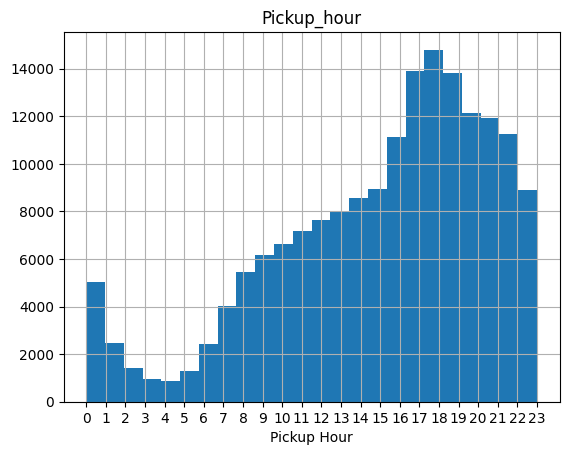

In [27]:
df.hist(column='Pickup_hour',bins=24)
plt.xlabel('Pickup Hour')

plt.xticks(range(0, 24))

plt.show()

#### Findings:
##### Upon analyzing the peak-hour rides, it is observed that the majority of rides occur between 4 PM and 7 PM.

### Correlation of the Features

In [28]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Pickup_month,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_hour,Dropoff_minutes
VendorID,1.000000,0.099990,0.002857,-0.106361,-0.001315,-0.003946,-0.530096,0.043941,0.023642,-0.063197,0.039695,-0.023495,0.036483,0.000609,0.015391,-0.002201,0.006809,0.012601,-0.004681
passenger_count,0.099990,1.000000,0.010163,-0.023627,-0.000822,-0.000726,-0.039732,0.017175,0.042856,-0.002800,0.053224,-0.002266,0.040786,0.009256,0.025038,-0.001812,0.018122,0.020078,0.001416
trip_distance,0.002857,0.010163,1.000000,0.014745,-0.000958,-0.002496,-0.001849,0.005847,0.006778,0.000459,0.009911,-0.060883,0.126236,-0.000132,-0.006228,-0.000779,0.003446,-0.007436,0.002422
RatecodeID,-0.106361,-0.023627,0.014745,1.000000,-0.001090,-0.000644,-0.070959,-0.032172,0.063754,0.002579,0.055527,-0.197608,-0.004480,-0.003022,-0.048375,0.004209,-0.002353,-0.040883,0.002035
PULocationID,-0.001315,-0.000822,-0.000958,-0.001090,1.000000,-0.000161,0.001495,0.000748,-0.000868,-0.000501,0.000715,0.001194,-0.000654,0.000911,-0.001881,0.002786,0.001806,-0.001258,-0.001842
DOLocationID,-0.003946,-0.000726,-0.002496,-0.000644,-0.000161,1.000000,0.002955,-0.000247,-0.002290,-0.002810,-0.002954,0.000641,-0.004940,-0.001634,0.001231,0.001956,0.001943,-0.000340,0.000871
extra,-0.530096,-0.039732,-0.001849,-0.070959,0.001495,0.002955,1.000000,0.160331,0.201179,0.170831,0.234346,0.068088,0.337456,-0.005443,0.211587,0.000417,-0.010771,0.217855,0.000041
tip_amount,0.043941,0.017175,0.005847,-0.032172,0.000748,-0.000247,0.160331,1.000000,0.411588,0.076436,0.638658,-0.059346,0.335614,-0.003101,0.012363,0.003590,0.008749,0.011519,-0.002319
tolls_amount,0.023642,0.042856,0.006778,0.063754,-0.000868,-0.002290,0.201179,0.411588,1.000000,0.051190,0.684765,-0.134409,0.437600,-0.000422,-0.039545,0.004469,0.008001,-0.033011,-0.002853
improvement_surcharge,-0.063197,-0.002800,0.000459,0.002579,-0.000501,-0.002810,0.170831,0.076436,0.051190,1.000000,0.224036,0.528606,0.083739,-0.000392,0.007046,0.002939,-0.000498,0.007453,0.001070


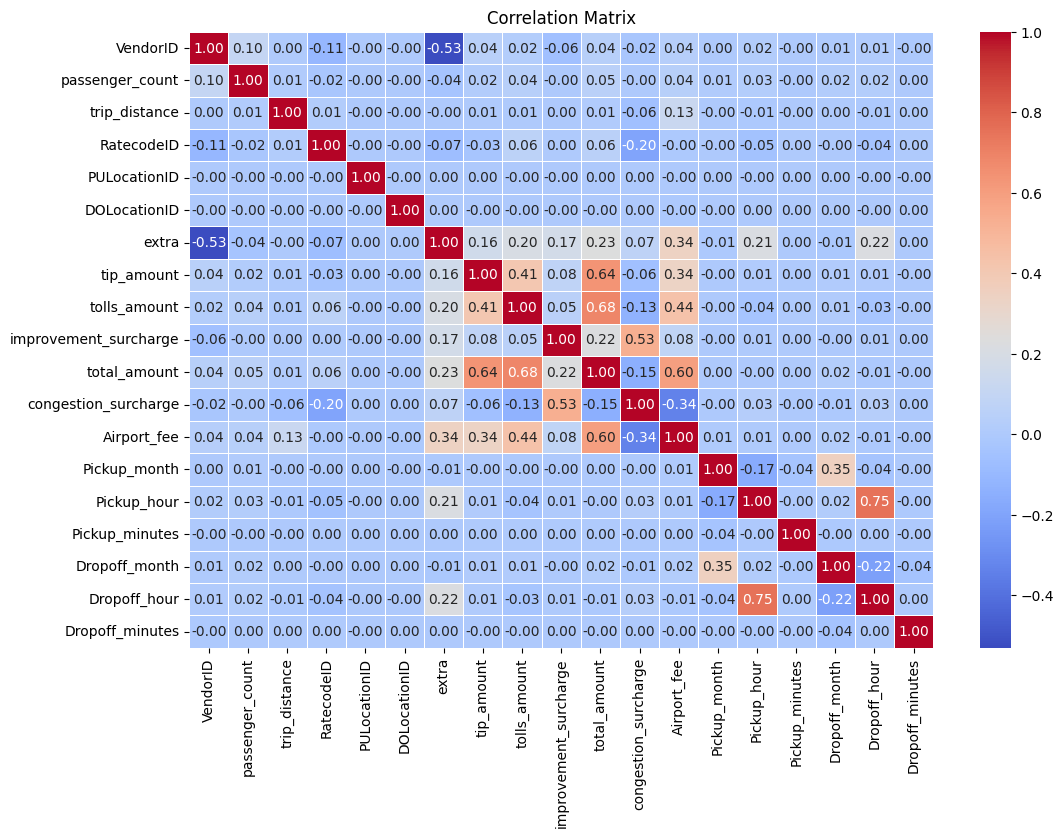

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Findings
1. **VendorID:**
   - Negatively correlated with 'extra' (-0.53): As VendorID increases, the 'extra' tends to decrease.

2. **passenger_count:**
   - Positively correlated with 'total_amount' (0.05): More passengers may lead to a higher total amount.

3. **trip_distance:**
   - Positively correlated with 'Airport_fee' (0.13): Longer trip distances might incur higher airport fees.

4. **RatecodeID:**
   - Negatively correlated with 'extra' (-0.07): Certain rate codes may result in lower extra charges.

5. **PULocationID & DOLocationID:**
   - No strong correlations observed.

6. **extra:**
   - Strongly negatively correlated with 'VendorID' (-0.53) and positively correlated with 'total_amount' (0.23): Extra charges significantly impact the total amount.

7. **tip_amount:**
   - Strongly positively correlated with 'total_amount' (0.64): Tips contribute significantly to the total amount.

8. **tolls_amount:**
   - Strongly positively correlated with 'total_amount' (0.68): Toll amounts contribute significantly to the total amount.

9. **improvement_surcharge:**
   - Strongly positively correlated with 'total_amount' (0.22) and 'congestion_surcharge' (0.53): This surcharge contributes to the total amount and congestion surcharge.

10. **total_amount:**
    - Correlated with various features, with the strongest correlation observed with 'tip_amount' and 'tolls_amount'.

11. **congestion_surcharge:**
    - Strongly negatively correlated with 'extra' (-0.34) and positively correlated with 'improvement_surcharge' (0.53): Congestion surcharge is affected by extra charges.

12. **Airport_fee:**
    - Strongly positively correlated with 'extra' (0.34) and 'tolls_amount' (0.44): Airport fees are influenced by extra charges and toll amounts.

13. **Peak Hour Ride**
    - Strongly positively correlated with 'extra' (0.41): extra are influenced by Peak Hour Ride

14. **Pickup_month, Pickup_hour, Pickup_minutes, Dropoff_month, Dropoff_hour, Dropoff_minutes:**
    - No strong correlations observed.
 


### Separating the Features and Values (Labels/Output)

In [30]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_weekday',
       'Pickup_month', 'Pickup_date', 'Pickup_hour', 'Pickup_minutes',
       'Dropoff_month', 'Dropoff_date', 'Dropoff_hour', 'Dropoff_minutes'],
      dtype='object')

In [31]:
features = df.drop('total_amount',axis = 1)
Value = df['total_amount']

In [32]:
features.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,Airport_fee,pickup_weekday,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,...,0.0,Wednesday,6,28,17,20,6,28,16,34
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,...,0.0,Thursday,6,29,23,5,6,29,22,1
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,...,0.0,Friday,6,30,10,19,6,30,11,13
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,...,0.0,Thursday,6,29,13,23,6,29,14,20
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,...,0.0,Thursday,6,29,22,3,6,29,22,22


In [33]:
features.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'pickup_weekday', 'Pickup_month',
       'Pickup_date', 'Pickup_hour', 'Pickup_minutes', 'Dropoff_month',
       'Dropoff_date', 'Dropoff_hour', 'Dropoff_minutes'],
      dtype='object')

In [34]:
Value.head()

0    20.64
1    25.55
2    17.64
3    12.80
4    18.00
Name: total_amount, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, Value, test_size=0.2, random_state=42)

In [36]:
X_train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'pickup_weekday', 'Pickup_month',
       'Pickup_date', 'Pickup_hour', 'Pickup_minutes', 'Dropoff_month',
       'Dropoff_date', 'Dropoff_hour', 'Dropoff_minutes'],
      dtype='object')

In [37]:
X_train.shape, X_train.shape

((140000, 23), (140000, 23))

In [38]:
X_test.shape, y_test.shape

((35000, 23), (35000,))

### Impuation of Missing Data, Encoding of Categoraical Data & Scaling of the Numerical Data's

#### Checking columns with missing values

In [39]:
X_train.isnull().sum()

VendorID                    0
passenger_count          4841
trip_distance               0
RatecodeID               4841
store_and_fwd_flag       4841
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     4841
Airport_fee              4841
pickup_weekday              0
Pickup_month                0
Pickup_date                 0
Pickup_hour                 0
Pickup_minutes              0
Dropoff_month               0
Dropoff_date                0
Dropoff_hour                0
Dropoff_minutes             0
dtype: int64

In [40]:
X_train.isin(['?']).sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
pickup_weekday           0
Pickup_month             0
Pickup_date              0
Pickup_hour              0
Pickup_minutes           0
Dropoff_month            0
Dropoff_date             0
Dropoff_hour             0
Dropoff_minutes          0
dtype: int64

#### Findings:
- After checking the Null values it's noted that 5 Columns contains null values passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge and Airport_fee

#### Process for Filling Null Values

##### 1. Passenger Count:
Filling the missing values in the 'passenger_count' column, with the most common value (the mode).

##### 2. RatecodeID:
Filling the missing values in the 'RatecodeID' column, with the most common value (the mode).

##### 3. Store and Forward Flag:
Filling the missing values in the 'store_and_fwd_flag' column, with the most common value (the mode).

##### 4. Congestion Surcharge:
Filling the missing values in the 'congestion_surcharge' column, with the average value (the mean).

##### 5. Airport Fee:
Filling the missing values in the 'Airport_fee' column, with the average value (the mean).


#### Defining the Column Transformer for Imputation

In [41]:
column_order = X_train.columns

# Impuation transformers
imput =[
        ('passenger_count', SimpleImputer(strategy='most_frequent',missing_values=np.nan), ['passenger_count']),
        ('RatecodeID', SimpleImputer(strategy='most_frequent',missing_values=np.nan), ['RatecodeID']),
        ('store_and_fwd_flag', SimpleImputer(strategy='most_frequent',missing_values=np.nan), ['store_and_fwd_flag']),
        ('congestion_surcharge', SimpleImputer(strategy='mean',missing_values=np.nan), ['congestion_surcharge']),
        ('Airport_fee', SimpleImputer(strategy='mean',missing_values=np.nan), ['Airport_fee'])
    ]

imputCT = ColumnTransformer(transformers= imput, remainder= "passthrough", verbose_feature_names_out=False)
imputCT

ColumnTransformer(remainder='passthrough',
                  transformers=[('passenger_count',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['passenger_count']),
                                ('RatecodeID',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['RatecodeID']),
                                ('store_and_fwd_flag',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['store_and_fwd_flag']),
                                ('congestion_surcharge', SimpleImputer(),
                                 ['congestion_surcharge']),
                                ('Airport_fee', SimpleImputer(),
                                 ['Airport_fee'])],
                  verbose_feature_names_out=False)

#### Checking the columns for Encding and Scaling

In [42]:
X_train.select_dtypes(exclude=['int', 'float'])

,store_and_fwd_flag,payment_type,pickup_weekday,Pickup_date,Dropoff_date
143961,N,Credit Card,Thursday,29,30
170292,N,Credit Card,Wednesday,28,28
161029,N,unknown,Friday,30,30
84006,N,Credit Card,Thursday,29,29
95628,N,Credit Card,Wednesday,28,28
...,...,...,...,...,...
119879,N,Credit Card,Friday,30,30
103694,N,Credit Card,Friday,30,30
131932,N,Credit Card,Thursday,29,29
146867,N,Cash,Friday,30,30


In [43]:
X_train.select_dtypes(exclude=['int', 'float']).columns

Index(['store_and_fwd_flag', 'payment_type', 'pickup_weekday', 'Pickup_date',
       'Dropoff_date'],
      dtype='object')

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 143961 to 121958
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               140000 non-null  int64  
 1   passenger_count        135159 non-null  float64
 2   trip_distance          140000 non-null  float64
 3   RatecodeID             135159 non-null  float64
 4   store_and_fwd_flag     135159 non-null  object 
 5   PULocationID           140000 non-null  int64  
 6   DOLocationID           140000 non-null  int64  
 7   payment_type           140000 non-null  object 
 8   extra                  140000 non-null  float64
 9   tip_amount             140000 non-null  float64
 10  tolls_amount           140000 non-null  float64
 11  improvement_surcharge  140000 non-null  float64
 12  congestion_surcharge   135159 non-null  float64
 13  Airport_fee            135159 non-null  float64
 14  pickup_weekday         140000 non-nu

#### Findings:

1. After analyzing the columns to be encoded, it's found that **"store_and_fwd_flag," "payment_type," and "pickup_weekday"** needs **encoding**.
2. After analyzing the columns to be scaled, it's found that **"passenger_count", "congestion_surcharge", "Airport_fee"** needs **scaling**.

For encoding, One-Hot Encoder will be used, and for scaling, MinMaxScaling will be applied

In [45]:
# Defining columns to be encoded and scaled
columns_to_onehotencode = ["store_and_fwd_flag", "payment_type", "pickup_weekday"]
columns_to_scale = ['passenger_count', 'congestion_surcharge', 'Airport_fee']

# encoding_scaling Transformer
encoding_scaling = [
        ('OneHot', OneHotEncoder(sparse_output= False), columns_to_onehotencode),
        ('Scaling', MinMaxScaler(), columns_to_scale)
]
encoding_scalingCT =  ColumnTransformer(transformers= encoding_scaling, remainder= "passthrough", verbose_feature_names_out=False)

encoding_scalingCT

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(sparse_output=False),
                                 ['store_and_fwd_flag', 'payment_type',
                                  'pickup_weekday']),
                                ('Scaling', MinMaxScaler(),
                                 ['passenger_count', 'congestion_surcharge',
                                  'Airport_fee'])],
                  verbose_feature_names_out=False)

#### Creating a Pipeline Using the Imputation and Encoding_scaling Column Transformer

In [46]:
steps = [
    ('Imputation', imputCT),
    ("Encoding_scaling",encoding_scalingCT)
]

pipe = Pipeline(steps = steps).set_output(transform="pandas")

In [47]:
pipe

Pipeline(steps=[('Imputation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passenger_count',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['passenger_count']),
                                                 ('RatecodeID',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['RatecodeID']),
                                                 ('store_and_fwd_flag',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['store_and_fwd_flag']),
                                                 ('congestion_surcharge',
                                                  Simp...
                                                  SimpleImputer(),
                                                  ['Airport_fee'])],
                                   verbose_feature_names_out=False)),
                ('Encoding_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['store_and_fwd_flag',
                                                   'payment_type',
                                                   'pickup_weekday']),
                                                 ('Scaling', MinMaxScaler(),
                                                  ['passenger_count',
                                                   'congestion_surcharge',
                                                   'Airport_fee'])],
                                   verbose_feature_names_out=False))])

#### Fitting and transforming the pipeline on the training data

In [48]:
X_train_transformed = pipe.fit_transform(X_train)
X_train_transformed

,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,pickup_weekday_Friday,pickup_weekday_Saturday,pickup_weekday_Thursday,...,tolls_amount,improvement_surcharge,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes
143961,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,6,29,23,37,6,30,0,13
170292,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6,28,19,10,6,28,18,54
161029,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,-1.0,6,30,21,37,6,30,21,32
84006,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,6,29,20,2,6,29,21,9
95628,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6,28,17,17,6,28,17,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,9,37,6,30,9,55
103694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,9,42,6,30,8,55
131932,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,6,29,14,34,6,29,15,0
146867,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,16,37,6,30,17,43


In [49]:
X_train_transformed.columns

Index(['store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'payment_type_Cash',
       'payment_type_Credit Card', 'payment_type_UPI', 'payment_type_Wallet',
       'payment_type_unknown', 'pickup_weekday_Friday',
       'pickup_weekday_Saturday', 'pickup_weekday_Thursday',
       'pickup_weekday_Wednesday', 'passenger_count', 'congestion_surcharge',
       'Airport_fee', 'RatecodeID', 'VendorID', 'trip_distance',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'Pickup_month', 'Pickup_date', 'Pickup_hour',
       'Pickup_minutes', 'Dropoff_month', 'Dropoff_date', 'Dropoff_hour',
       'Dropoff_minutes'],
      dtype='object')

In [50]:
X_train_transformed.isnull().sum()

store_and_fwd_flag_N        0
store_and_fwd_flag_Y        0
payment_type_Cash           0
payment_type_Credit Card    0
payment_type_UPI            0
payment_type_Wallet         0
payment_type_unknown        0
pickup_weekday_Friday       0
pickup_weekday_Saturday     0
pickup_weekday_Thursday     0
pickup_weekday_Wednesday    0
passenger_count             0
congestion_surcharge        0
Airport_fee                 0
RatecodeID                  0
VendorID                    0
trip_distance               0
PULocationID                0
DOLocationID                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
Pickup_month                0
Pickup_date                 0
Pickup_hour                 0
Pickup_minutes              0
Dropoff_month               0
Dropoff_date                0
Dropoff_hour                0
Dropoff_minutes             0
dtype: int64

#### Transforming the Test Data

In [51]:
X_test_transformed = pipe.transform(X_test)
X_test_transformed

,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,pickup_weekday_Friday,pickup_weekday_Saturday,pickup_weekday_Thursday,...,tolls_amount,improvement_surcharge,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes
148789,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6,28,17,31,6,28,18,22
169618,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,6,29,19,15,6,29,19,7
131258,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,18,28,6,30,18,1
31864,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,22,57,6,30,22,55
11032,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6,28,18,39,6,28,17,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118775,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,6,29,19,56,6,29,20,20
36053,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,15,49,6,30,16,9
123138,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,18,14,6,30,18,26
77368,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,6,39,6,30,6,15


In [52]:
X_test_transformed.columns

Index(['store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'payment_type_Cash',
       'payment_type_Credit Card', 'payment_type_UPI', 'payment_type_Wallet',
       'payment_type_unknown', 'pickup_weekday_Friday',
       'pickup_weekday_Saturday', 'pickup_weekday_Thursday',
       'pickup_weekday_Wednesday', 'passenger_count', 'congestion_surcharge',
       'Airport_fee', 'RatecodeID', 'VendorID', 'trip_distance',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'Pickup_month', 'Pickup_date', 'Pickup_hour',
       'Pickup_minutes', 'Dropoff_month', 'Dropoff_date', 'Dropoff_hour',
       'Dropoff_minutes'],
      dtype='object')

In [53]:
X_test_transformed.isnull().sum()

store_and_fwd_flag_N        0
store_and_fwd_flag_Y        0
payment_type_Cash           0
payment_type_Credit Card    0
payment_type_UPI            0
payment_type_Wallet         0
payment_type_unknown        0
pickup_weekday_Friday       0
pickup_weekday_Saturday     0
pickup_weekday_Thursday     0
pickup_weekday_Wednesday    0
passenger_count             0
congestion_surcharge        0
Airport_fee                 0
RatecodeID                  0
VendorID                    0
trip_distance               0
PULocationID                0
DOLocationID                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
Pickup_month                0
Pickup_date                 0
Pickup_hour                 0
Pickup_minutes              0
Dropoff_month               0
Dropoff_date                0
Dropoff_hour                0
Dropoff_minutes             0
dtype: int64

## Differnt Models Tuning and Testing

**1. Linear Regression**

In [54]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [55]:
linear_model.fit(X_train_transformed, y_train)
y_pred_linear = linear_model.predict(X_test_transformed)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Mean Squared Error: {mse_linear}")
print(f"Linear Regression - R-squared (R2): {r2_linear}")

Linear Regression - Mean Squared Error: 178.35028651085355
Linear Regression - R-squared (R2): 0.7259346099497832


**2. Ridge Regression**

In [56]:
ridge_model = Ridge(alpha=1.0)
ridge_model

Ridge()

> Created a Ridge regression model with an alpha hyperparameter set to 1.0. This helps prevent overfitting, finding a good balance between fitting the training data well and keeping the model simple for better performance on new, unseen data

In [57]:
ridge_model.fit(X_train_transformed, y_train)
y_pred_ridge = ridge_model.predict(X_test_transformed)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R-squared (R2): {r2_ridge}")

Ridge Regression - Mean Squared Error: 179.74439679580473
Ridge Regression - R-squared (R2): 0.7237923236294588


**3. Lasso Regression**

In [58]:
lasso_model = Lasso(alpha=0.01)
lasso_model

Lasso(alpha=0.01)

> Created a Lasso regression model with an alpha hyperparameter set to 0.01. This applies regularization to encourage sparsity in the feature coefficients, helping select a subset of key features and enhancing the model's interpretability.

In [59]:
lasso_model.fit(X_train_transformed, y_train)
y_pred_lasso = lasso_model.predict(X_test_transformed)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R-squared (R2): {r2_lasso}")


Lasso Regression - Mean Squared Error: 180.63924231777654
Lasso Regression - R-squared (R2): 0.722417242087333


**4. Random Forest Regression**

In [60]:
random_forest_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
random_forest_model

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)

> Created a Random Forest regression model with 300 estimators, a maximum depth of 20 for each tree, a minimum of 5 samples required to split an internal node, and a minimum of 2 samples required to be at a leaf node.

In [61]:
random_forest_model.fit(X_train_transformed, y_train)
y_pred_rf = random_forest_model.predict(X_test_transformed)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared (R2): {r2_rf}")

Random Forest - Mean Squared Error: 24.489912865124296
Random Forest - R-squared (R2): 0.9623671054698998


#### Comparison of Different Models

In [62]:
models = ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor']
y_preds = [y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_rf ]

metrics_dict = {
    'Mean Squared Error (MSE)': [mean_squared_error(y_test, y_pred) for y_pred in y_preds],
    'Root Mean Squared Error (RMSE)': [mean_squared_error(y_test, y_pred, squared=False) for y_pred in y_preds],
    'Mean Absolute Error (MAE)': [mean_absolute_error(y_test, y_pred) for y_pred in y_preds],
    'R-squared (R2)': [r2_score(y_test, y_pred) for y_pred in y_preds],
}

metrics_df = pd.DataFrame(metrics_dict, index=models)
metrics_df

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),R-squared (R2)
LinearRegression,178.350287,13.354785,7.862489,0.725935
Ridge,179.744397,13.406879,7.899285,0.723792
Lasso,180.639242,13.440210,7.922227,0.722417
RandomForestRegressor,24.489913,4.948728,2.538151,0.962367


#### Models Cross validation

In [63]:
models_dict = {
    'LinearRegression': linear_model,
    'Ridge': ridge_model,
    'Lasso': lasso_model,
    'RandomForestRegressor': random_forest_model
}

results = []

for model_name, model in models_dict.items():
    r2_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='r2', n_jobs=-1)
    
    result = {
        'Model': model_name,
        'Mean Score': r2_scores.mean(),
        'Standard Deviation': r2_scores.std()
    }
    
    results.append(result)

results_df = pd.DataFrame(results)
results_df

,Model,Mean Score,Standard Deviation
0,LinearRegression,0.728315,0.015321
1,Ridge,0.725826,0.015800
2,Lasso,0.724571,0.015906
3,RandomForestRegressor,0.941089,0.015734


#### After Analysing the above Data:
##### The Random Forest Regressor performs better than the other linear models, showing significantly lower errors, a higher R-squared value, a better mean score, and lower Standard Deviation when analyzed using cross-validation. This suggests a better fit to the data

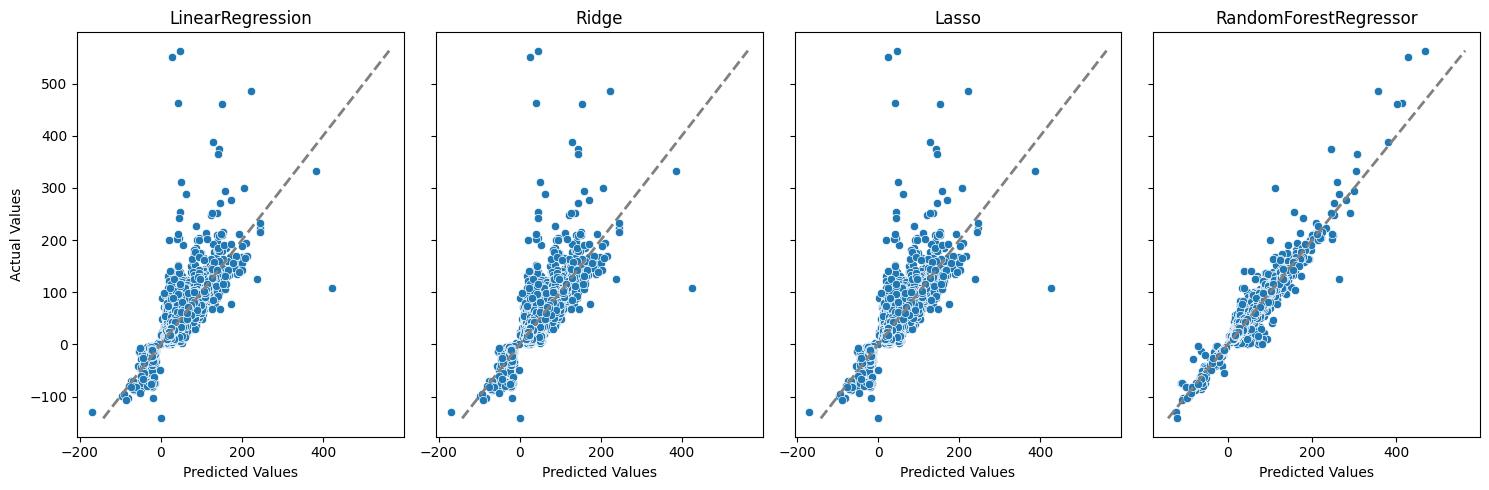

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5), sharey=True)

for i, ax in enumerate(axes):
    sns.scatterplot(x=y_preds[i], y=y_test, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='gray', linewidth=2)
    ax.set_title(models[i])
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')

plt.tight_layout()
plt.show()

#### Findings:
When using the Random Forest Regressor, we noticed that the predicted values are closer to the actual values compared to other models. This suggests that the predictions are more accurate with the Random Forest Regressor

#### Exploring Feature Importances with the Random Forest Regressor and Visualization

In [65]:
feature_importances = list(random_forest_model.feature_importances_)
feature_importances.sort()
feature_importances = feature_importances[::-1]
print("Feature Importances:")
for feature, importance in zip(X_train_transformed.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
store_and_fwd_flag_N: 0.7734155391842059
store_and_fwd_flag_Y: 0.08651836621897233
payment_type_Cash: 0.054499115944374114
payment_type_Credit Card: 0.04182355310153479
payment_type_UPI: 0.008351383601362417
payment_type_Wallet: 0.004048010683908316
payment_type_unknown: 0.003907564574242809
pickup_weekday_Friday: 0.003842617432325262
pickup_weekday_Saturday: 0.003727795142725954
pickup_weekday_Thursday: 0.0037143757036991708
pickup_weekday_Wednesday: 0.003397173034172319
passenger_count: 0.0032691637089417905
congestion_surcharge: 0.0018488810290366747
Airport_fee: 0.0012556573480242293
RatecodeID: 0.0009703857425038654
VendorID: 0.0009117505345892935
trip_distance: 0.0008966632269337888
PULocationID: 0.0008835095684682795
DOLocationID: 0.0006998143269128431
extra: 0.0005037757473137375
tip_amount: 0.0004776355685891421
tolls_amount: 0.00037637752500202927
improvement_surcharge: 0.00024386358246416702
Pickup_month: 0.0001773394437558308
Pickup_date: 0.000110262574

#### Findings

- **store_and_fwd_flag_N: 0.773**  
  The presence of the 'store_and_fwd_flag' being 'No' has the highest importance in predicting the target variable.

- **store_and_fwd_flag_Y: 0.087**  
  The presence of the 'store_and_fwd_flag' being 'Yes' has some importance but considerably less than 'No'.

- **payment_type_Cash: 0.054**  
  Payments made in cash have a significant impact on the prediction.

- **payment_type_Credit Card: 0.042**  
  Payments made with a credit card also contribute to the prediction.

- **payment_type_UPI: 0.008**  
  Payments made via UPI have a lower but still noticeable importance.

- **payment_type_Wallet: 0.004**  
  Payments made with a wallet have a relatively small impact.

- **payment_type_unknown: 0.004**  
  Transactions with an unknown payment type also contribute.

The importance of the remaining features decreases gradually, with features like 'pickup_weekday' and 'passenger_count' having noticeable importance, and others having minor contributions.

Features like 'Dropoff_hour', 'Dropoff_minutes', and 'Dropoff_date' have very minimal importance.


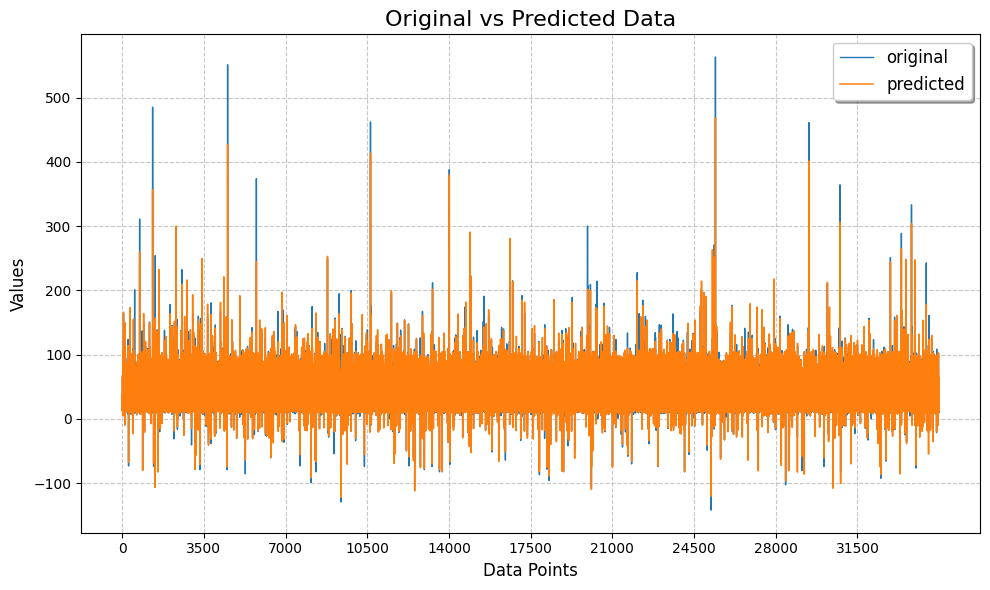

In [66]:
x_ax = range(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_rf, linewidth=1.1, label="predicted")

plt.title("Original vs Predicted Data", fontsize=16)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Values', fontsize=12)

plt.legend(loc='best', fancybox=True, shadow=True, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(np.arange(0, len(y_test), step=max(1, len(y_test) // 10)))

plt.tight_layout()
plt.show()

## Grid CV for RandomForest

In [67]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5 ,10],
    'min_samples_leaf': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

rf_grid.fit(X_train_transformed, y_train)

y_pred_grid = rf_grid.predict(X_test_transformed)
r2_grid = r2_score(y_test, y_pred_grid)

print(f"Best Random Forest Regression Model - R-squared (R2): {r2_grid}")
print(f"Best Random Forest Regression Model - Best Parameters: {rf_grid.best_params_}")

Best Random Forest Regression Model - R-squared (R2): 0.9623671054698998
Best Random Forest Regression Model - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


### Reading the Test Data

In [68]:
dfTest = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

### Preprocessing the Test Data

In [69]:
dfTest['tpep_pickup_datetime'] = pd.to_datetime(dfTest['tpep_pickup_datetime'])
dfTest['tpep_dropoff_datetime'] = pd.to_datetime(dfTest['tpep_dropoff_datetime'])

In [70]:
# Extracting various date and time components from the pickup and dropoff datetime columns in the test dataset

# Extracting pickup month
dfTest['Pickup_month'] = dfTest['tpep_pickup_datetime'].dt.month

# Extracting pickup date
dfTest['Pickup_date'] = dfTest['tpep_pickup_datetime'].dt.strftime('%d')

# Extracting pickup hour
dfTest['Pickup_hour'] = dfTest['tpep_pickup_datetime'].dt.hour

# Extracting pickup minutes
dfTest['Pickup_minutes'] = dfTest['tpep_pickup_datetime'].dt.minute

# Extracting dropoff month
dfTest['Dropoff_month'] = dfTest['tpep_dropoff_datetime'].dt.month

# Extracting dropoff date
dfTest['Dropoff_date'] = dfTest['tpep_dropoff_datetime'].dt.strftime('%d')

# Extracting dropoff hour
dfTest['Dropoff_hour'] = dfTest['tpep_dropoff_datetime'].dt.hour

# Extracting dropoff minutes
dfTest['Dropoff_minutes'] = dfTest['tpep_dropoff_datetime'].dt.minute

# Extracting pickup weekday
dfTest['pickup_weekday'] = dfTest['tpep_pickup_datetime'].dt.day_name()


In [71]:
dfTest.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Airport_fee,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes,pickup_weekday
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,...,0.00,6,29,17,41,6,29,18,30,Thursday
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,...,1.75,6,30,1,25,6,30,1,10,Friday
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,...,0.00,6,30,22,28,6,30,21,49,Friday
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,...,0.00,6,30,2,37,6,30,2,10,Friday
49999,1,2023-06-30 18:05:15,2023-06-30 17:15:16,1.0,1.31,1.0,N,7,174,Cash,...,0.00,6,30,18,5,6,30,17,15,Friday


In [72]:
dfTest.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Airport_fee,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes,pickup_weekday
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,...,0.00,6,29,17,41,6,29,18,30,Thursday
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,...,1.75,6,30,1,25,6,30,1,10,Friday
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,...,0.00,6,30,22,28,6,30,21,49,Friday
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,...,0.00,6,30,2,37,6,30,2,10,Friday
49999,1,2023-06-30 18:05:15,2023-06-30 17:15:16,1.0,1.31,1.0,N,7,174,Cash,...,0.00,6,30,18,5,6,30,17,15,Friday


## Removing Unnecessary Columns

In [73]:
dfTest.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace= True)

In [74]:
dfTest.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'Pickup_month', 'Pickup_date',
       'Pickup_hour', 'Pickup_minutes', 'Dropoff_month', 'Dropoff_date',
       'Dropoff_hour', 'Dropoff_minutes', 'pickup_weekday'],
      dtype='object')

In [75]:
dfTest.tail()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,Airport_fee,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes,pickup_weekday
49995,1,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,...,0.00,6,29,17,41,6,29,18,30,Thursday
49996,1,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,...,1.75,6,30,1,25,6,30,1,10,Friday
49997,1,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,...,0.00,6,30,22,28,6,30,21,49,Friday
49998,0,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,...,0.00,6,30,2,37,6,30,2,10,Friday
49999,1,1.0,1.31,1.0,N,7,174,Cash,2.5,1.966592,...,0.00,6,30,18,5,6,30,17,15,Friday


### Encoding and Scaling the Test file

In [76]:
df_test_encoded = pipe.transform(dfTest)

In [77]:
df_test_encoded.tail()

,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,pickup_weekday_Friday,pickup_weekday_Saturday,pickup_weekday_Thursday,...,tolls_amount,improvement_surcharge,Pickup_month,Pickup_date,Pickup_hour,Pickup_minutes,Dropoff_month,Dropoff_date,Dropoff_hour,Dropoff_minutes
49995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,6,29,17,41,6,29,18,30
49996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,1,25,6,30,1,10
49997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,22,28,6,30,21,49
49998,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,2,37,6,30,2,10
49999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6,30,18,5,6,30,17,15


### Predction on the Test Data

In [78]:
best_rf_model = rf_grid.best_estimator_

In [79]:
testPred  = best_rf_model.predict(df_test_encoded)

### Saving the Test data

In [80]:
testDF = pd.DataFrame(columns=['ID','total_amount'])
testDF['ID'] = [i for i in range(1,len(testPred)+1)]
testDF['total_amount'] = testPred
testDF.to_csv('submission.csv', index=False)